**Importing Necessary Libraries**

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in the notebook
%matplotlib inline

**Loading the Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_excel(io.BytesIO(uploaded['RTA Data 2020 to July 2023.xlsx']))

Saving RTA Data 2020 to July 2023.xlsx to RTA Data 2020 to July 2023.xlsx


**Initial Data Inspection**

In [6]:
# Show the first few rows of the dataset
df.head()

# Display summary information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object        
 12  Cause             

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,1
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


**Initial Data Preprocessing**

In [7]:
# Drop rows where essential fields are missing
df_cleaned = df.dropna(subset=['CallTime', 'responsetime', 'EcNumber'])

# Fill missing HospitalName with 'Unknown' since it's categorical
df_cleaned['HospitalName'].fillna('Unknown', inplace=True)

# Fill the minimal missing values in numeric columns with 0 (for vehicle involvement)
vehicle_columns = ['BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled',
                   'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
                   'TrucksInvolved', 'VansInvolved', 'OthersInvolved']
df_cleaned[vehicle_columns] = df_cleaned[vehicle_columns].fillna(0)

# Fill missing 'Age' with median
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

df_cleaned['CallTime'] = pd.to_datetime(df_cleaned['CallTime'], errors='coerce')

# Extracting Year, Month, Day, Hour from CallTime
df_cleaned['Year'] = df_cleaned['CallTime'].dt.year
df_cleaned['Month'] = df_cleaned['CallTime'].dt.month
df_cleaned['Day'] = df_cleaned['CallTime'].dt.day
df_cleaned['Hour'] = df_cleaned['CallTime'].dt.hour

<ipython-input-7-e3c624986d75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HospitalName'].fillna('Unknown', inplace=True)
<ipython-input-7-e3c624986d75>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[vehicle_columns] = df_cleaned[vehicle_columns].fillna(0)
<ipython-input-7-e3c624986d75>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['A

**Exploratory Data Analysis (EDA)**

**1. Univariate Analysis**

**1.1 Numerical Variables**

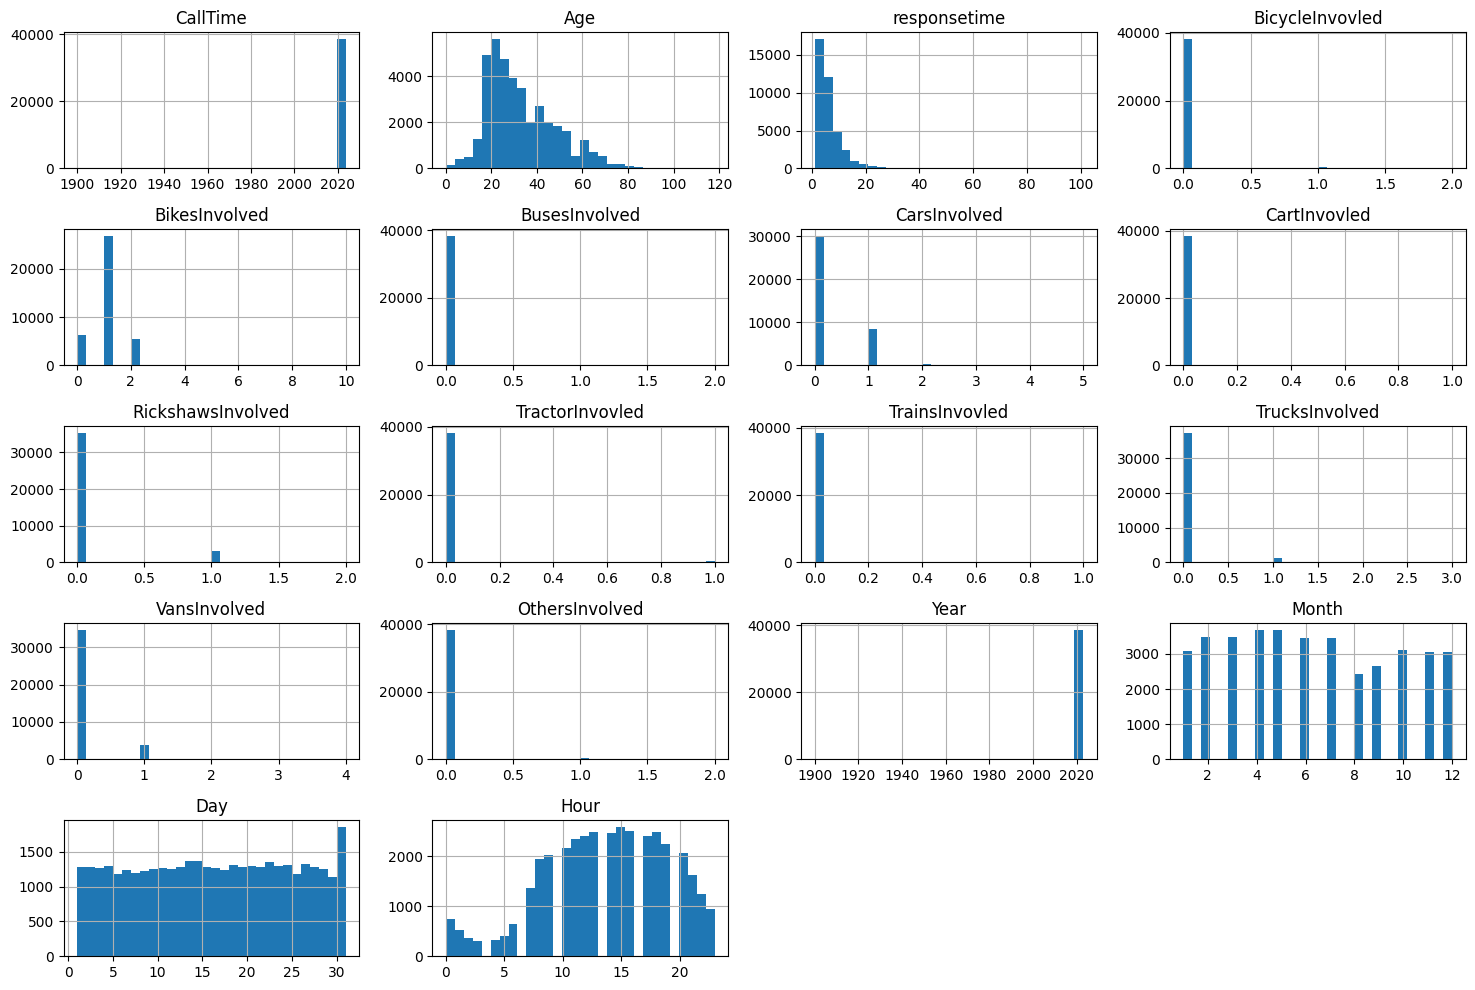

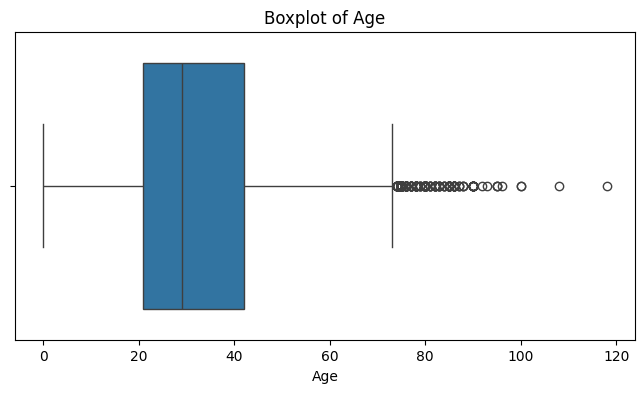

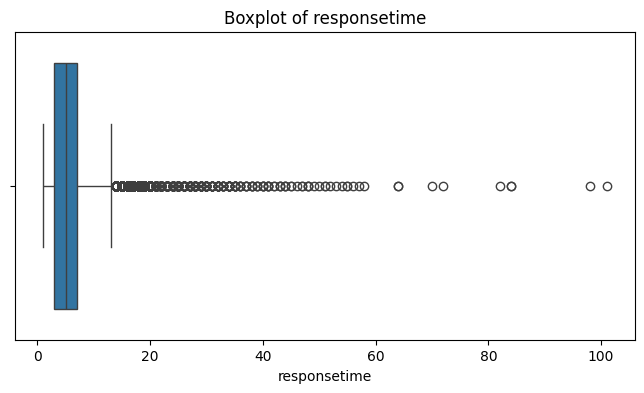

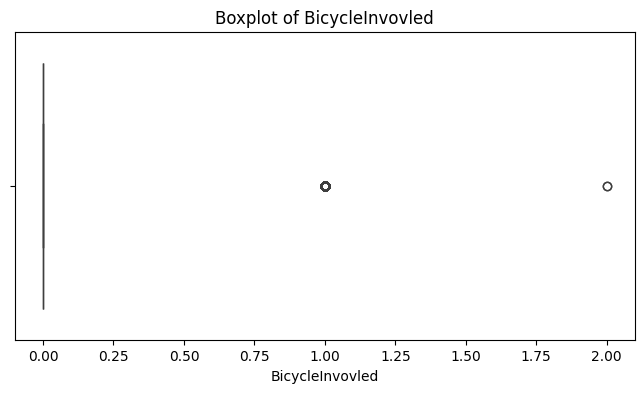

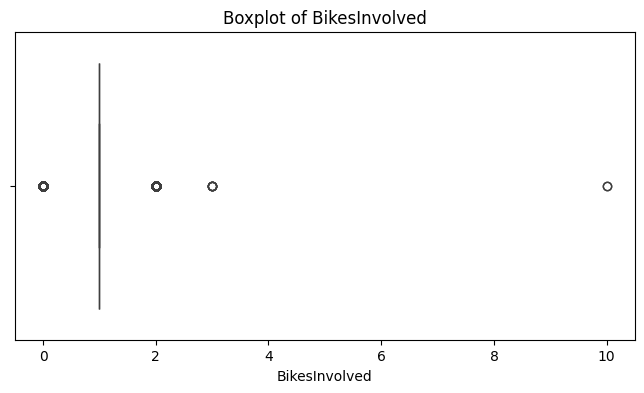

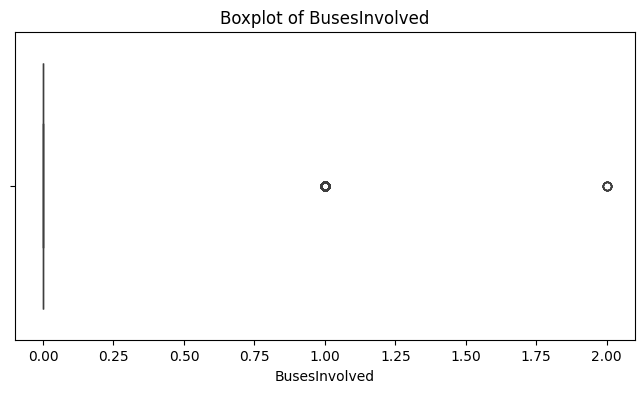

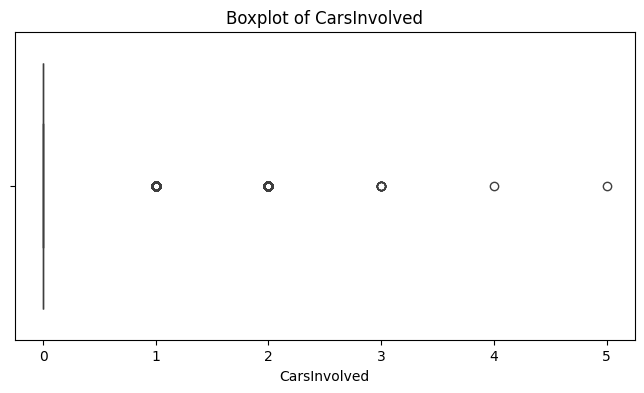

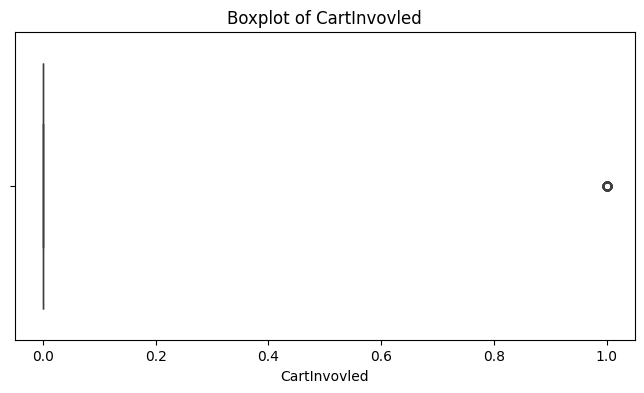

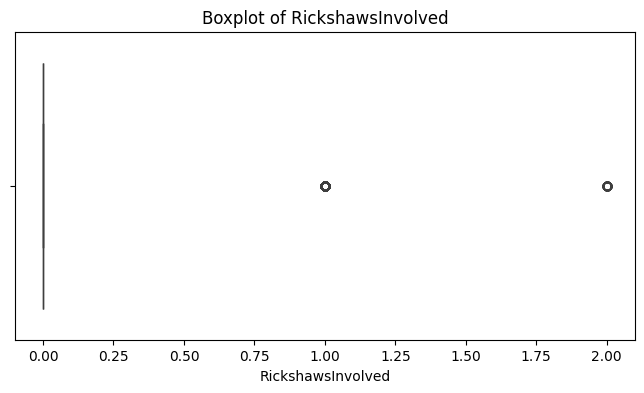

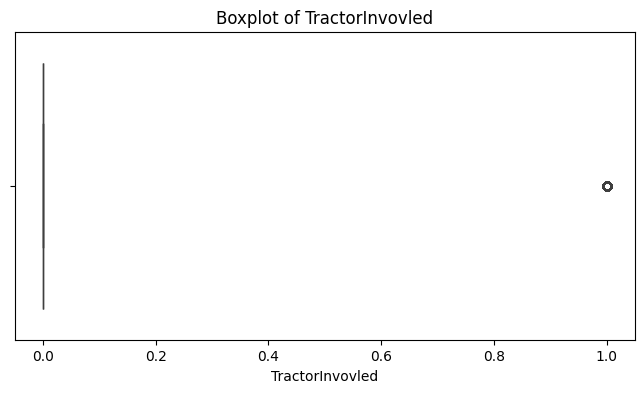

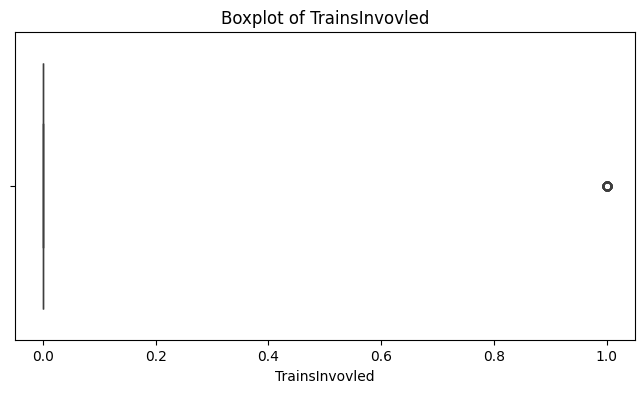

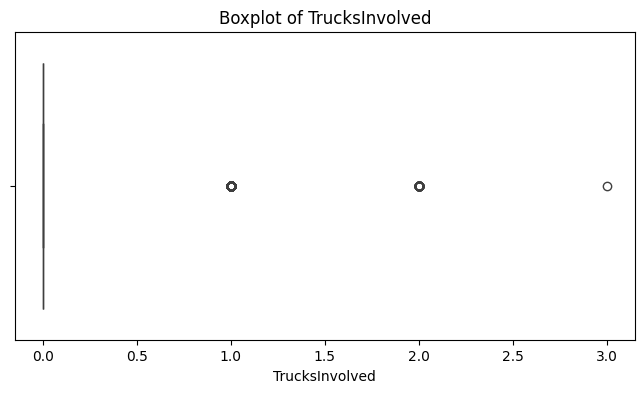

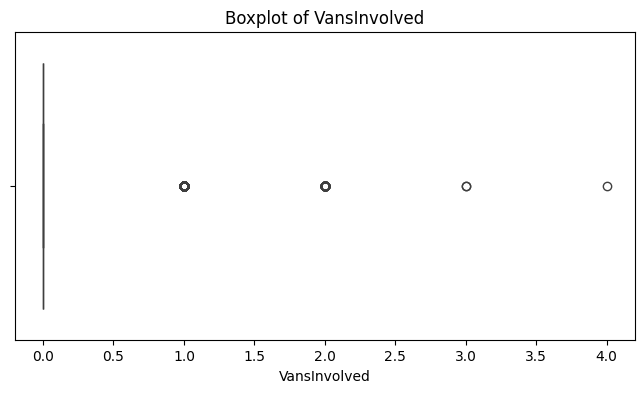

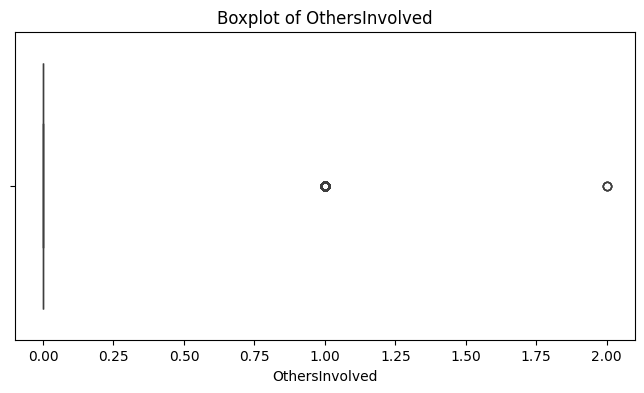

In [8]:
# Histogram and KDE for all numerical variables
df_cleaned.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots to inspect spread and outliers for numerical variables
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**1.2 Categorical Variables**

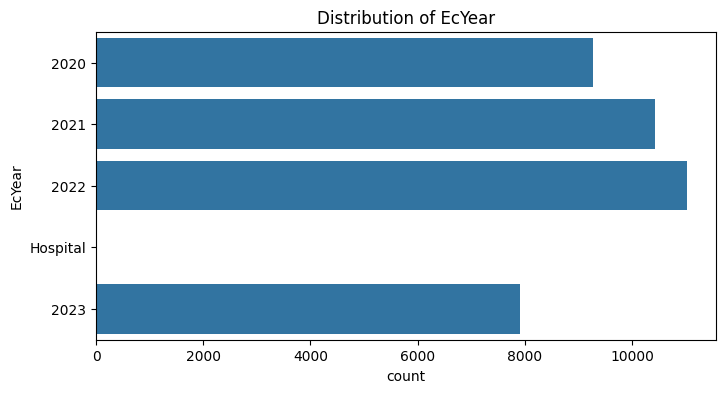

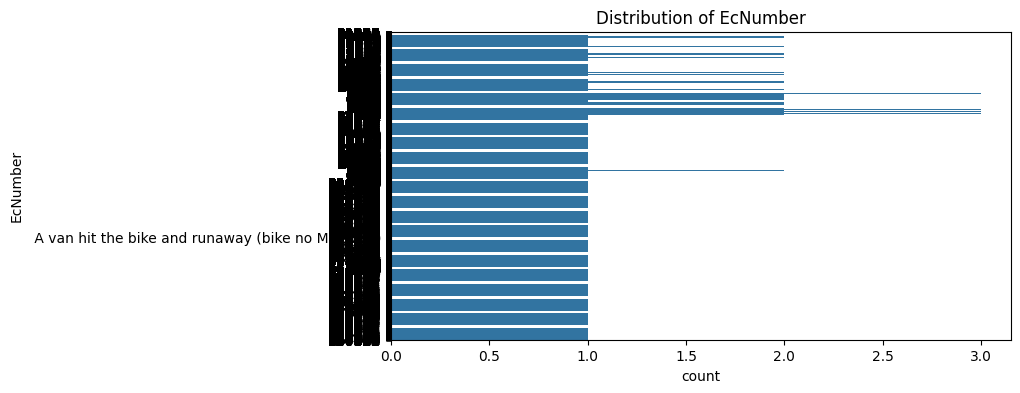

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


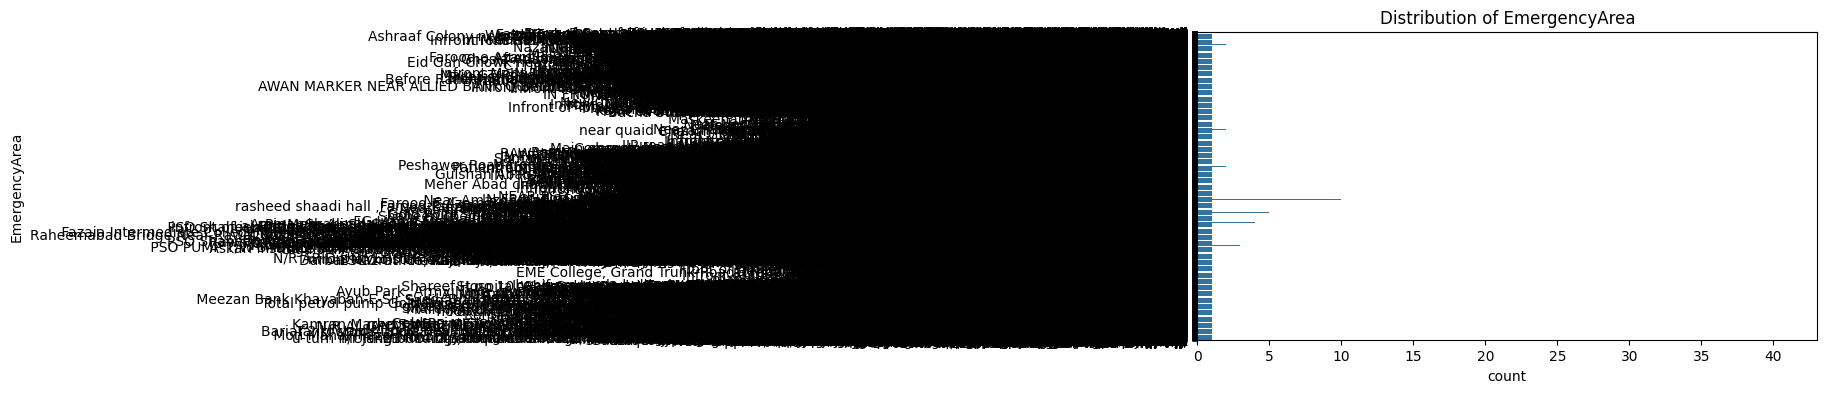

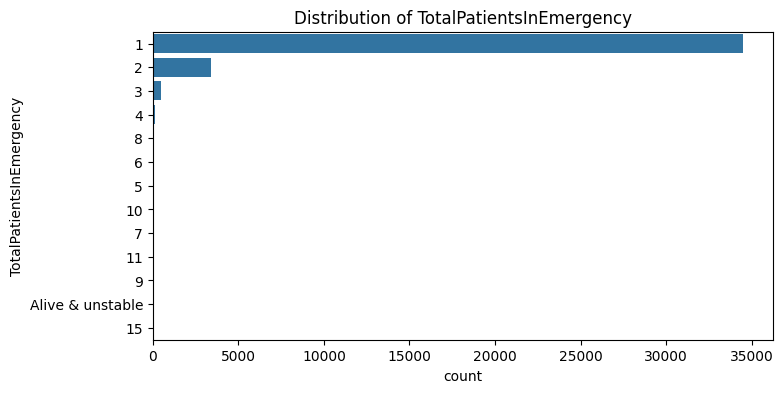

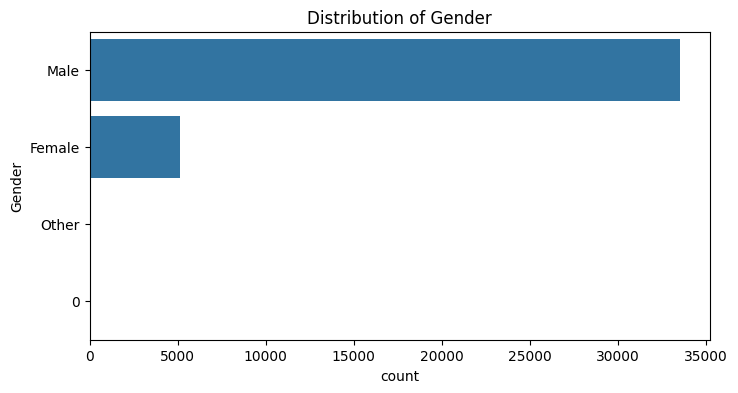

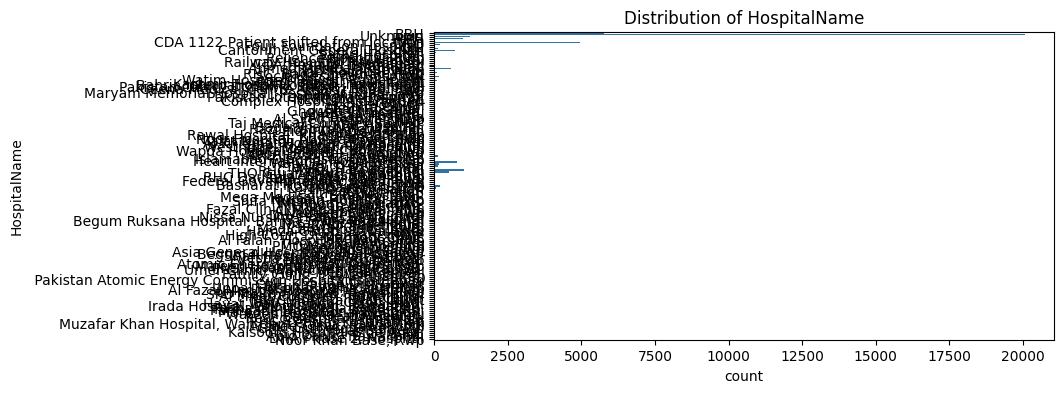

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1747 (\N{ARABIC LETTER YEH BARREE WITH HAMZA ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1656 (\N{ARABIC LETTER HIGH HAMZA YEH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

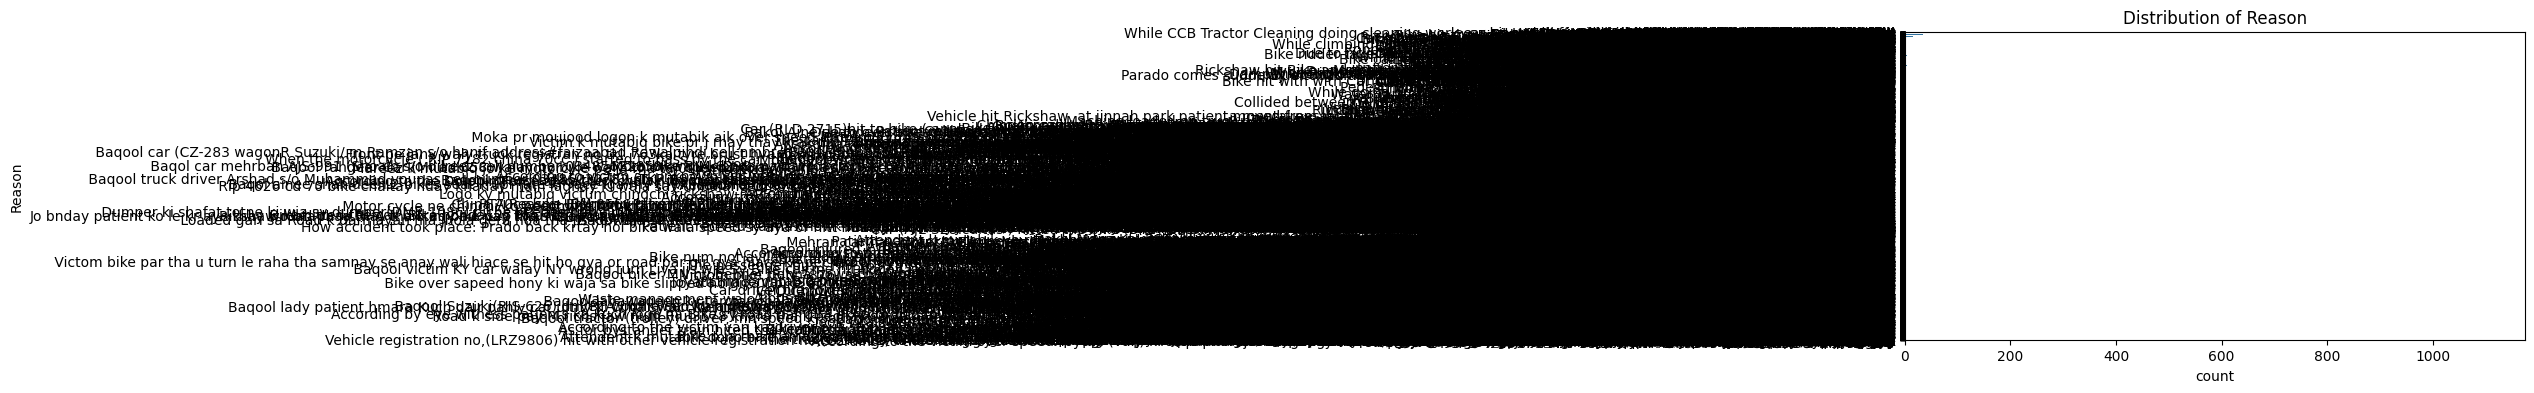

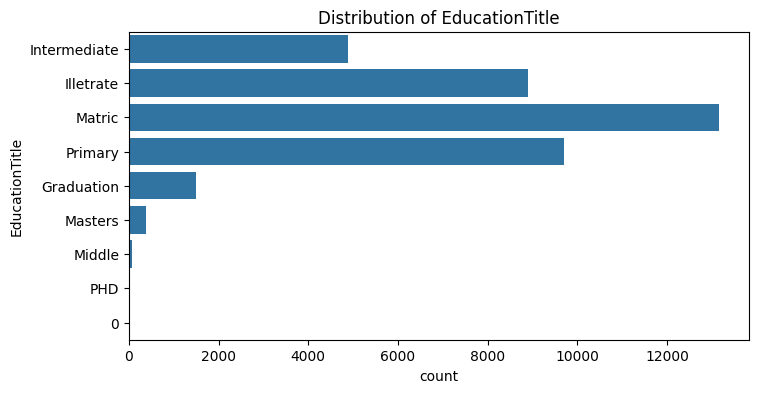

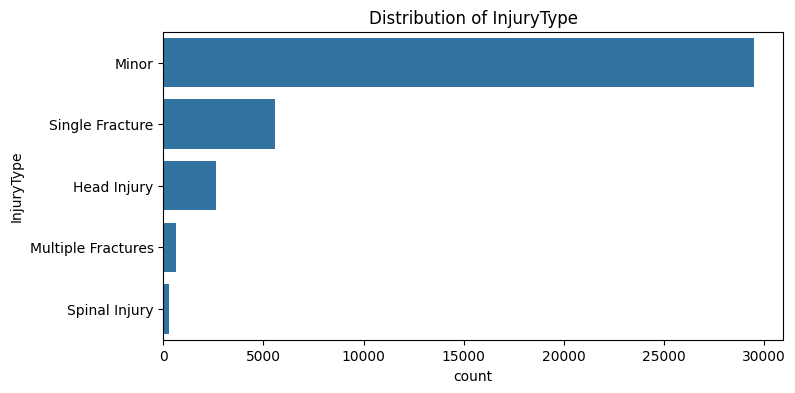

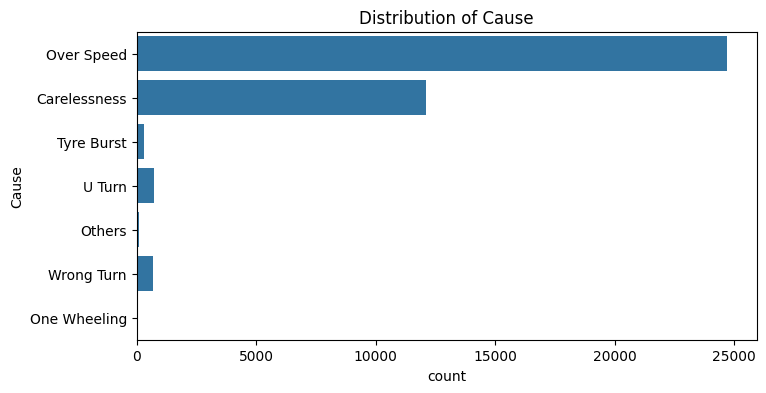

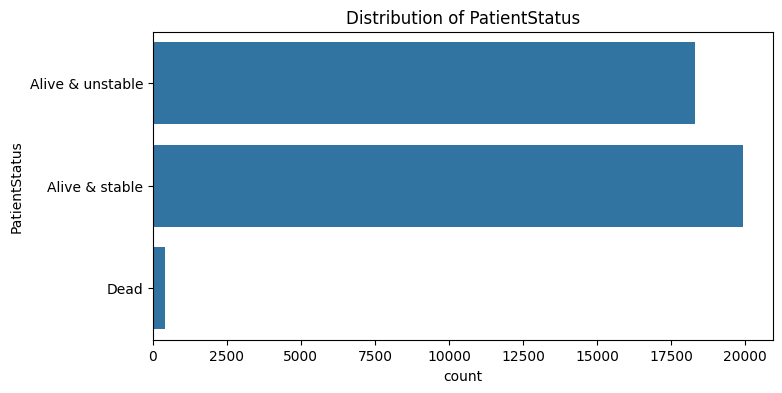

In [9]:
# Countplot for categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df_cleaned)
    plt.title(f'Distribution of {col}')
    plt.show()

**2. Bivariate Analysis**

**2.1 Numerical vs Numerical**

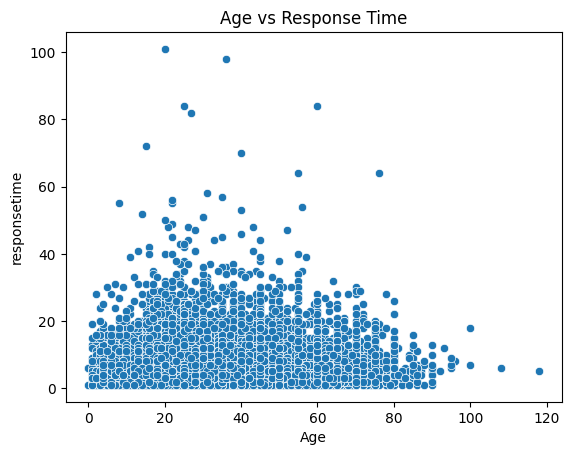

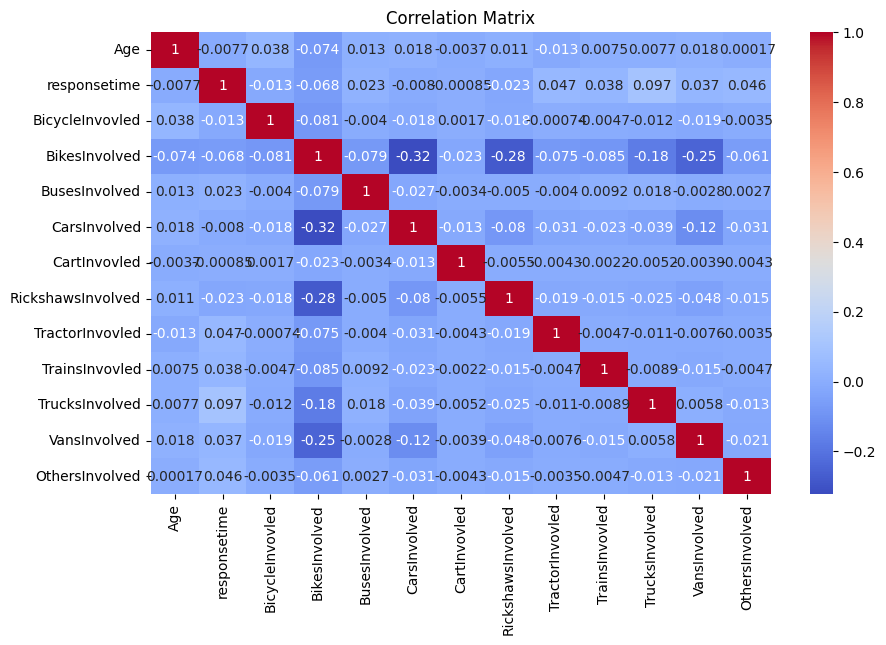

In [11]:
# Scatter plot for Age vs Response Time
sns.scatterplot(x='Age', y='responsetime', data=df_cleaned)
plt.title('Age vs Response Time')
plt.show()

# Select only numerical columns for the correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])  # Select only numeric data types

# Correlation matrix for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')  # Use numerical_cols instead of df_cleaned
plt.title('Correlation Matrix')
plt.show()

**2.2 Numerical vs Categorical**

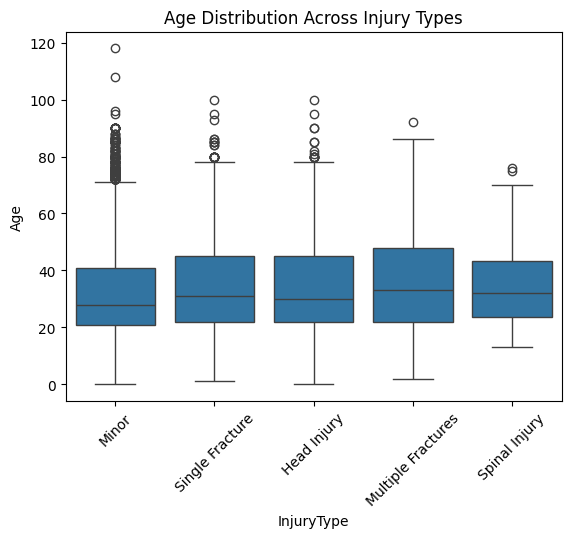

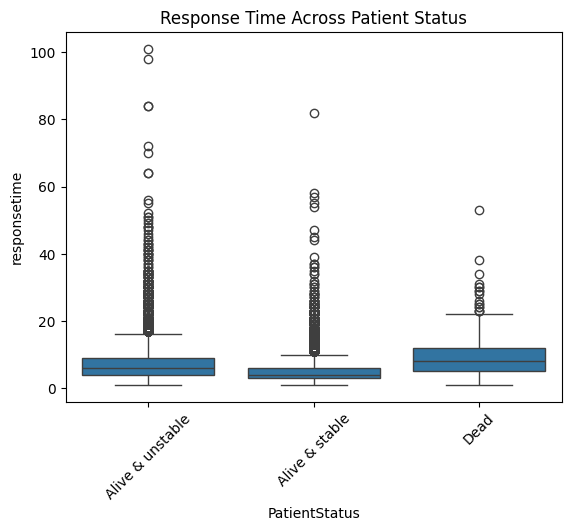

In [12]:
# Boxplot to compare Age across Injury Types
sns.boxplot(x='InjuryType', y='Age', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Age Distribution Across Injury Types')
plt.show()

# Boxplot for Response Time across different Patient Status
sns.boxplot(x='PatientStatus', y='responsetime', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Response Time Across Patient Status')
plt.show()

**2.3 Categorical vs Categorical**

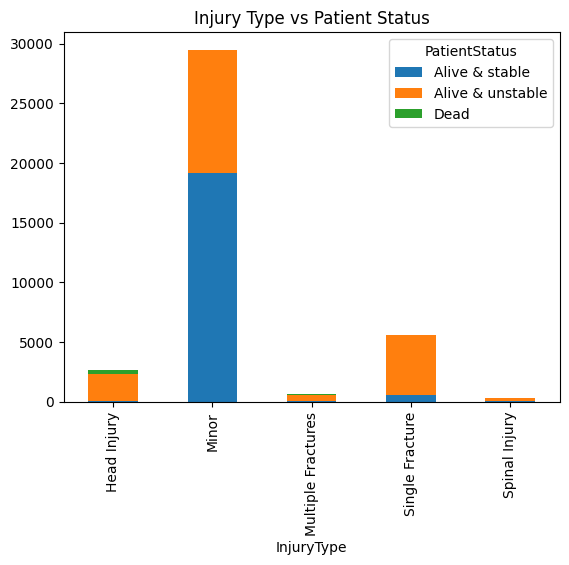

In [13]:
# Crosstab between Injury Type and Patient Status
pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus']).plot(kind='bar', stacked=True)
plt.title('Injury Type vs Patient Status')
plt.show()

**3. Multivariate Analysis**

**3.1 Pair Plots for Numerical Variables**

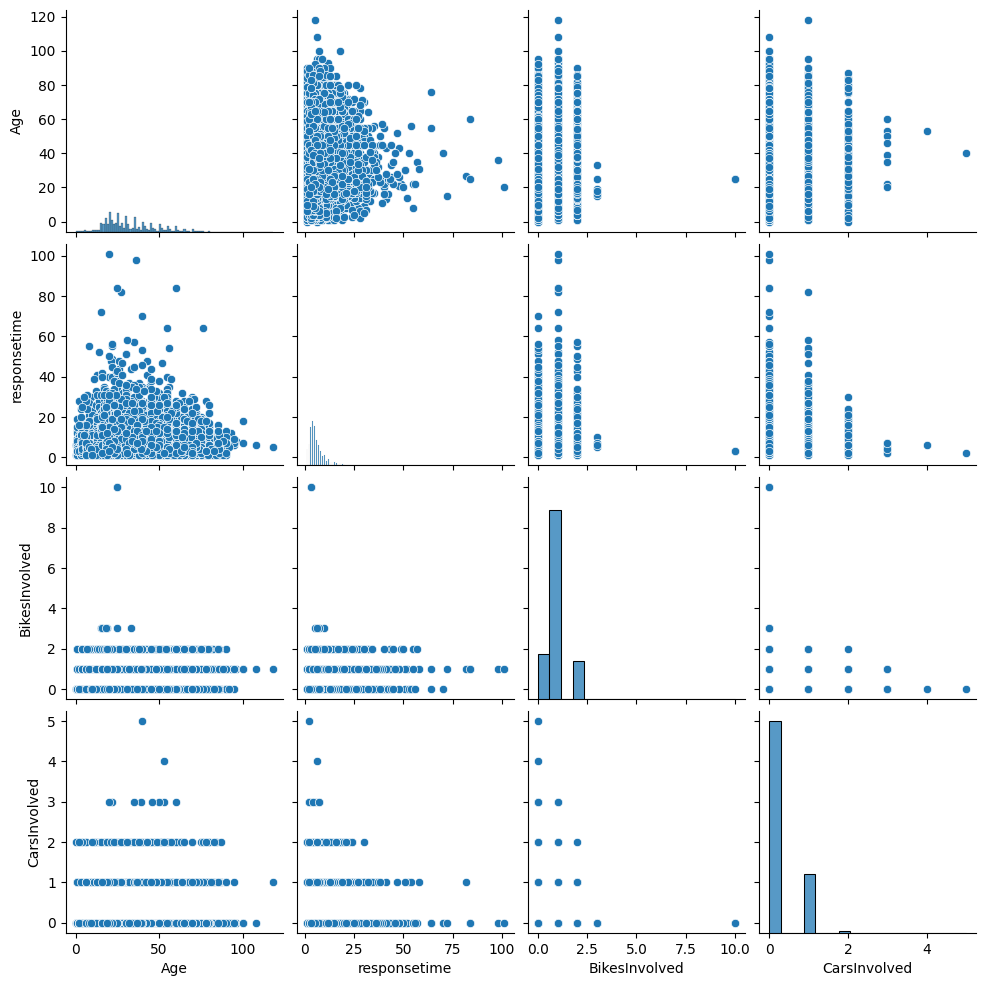

In [14]:
# Pair plot for visualizing relationships between multiple numerical variables
sns.pairplot(df_cleaned, vars=['Age', 'responsetime', 'BikesInvolved', 'CarsInvolved'])
plt.show()

**3.2 Heatmap for Correlations**

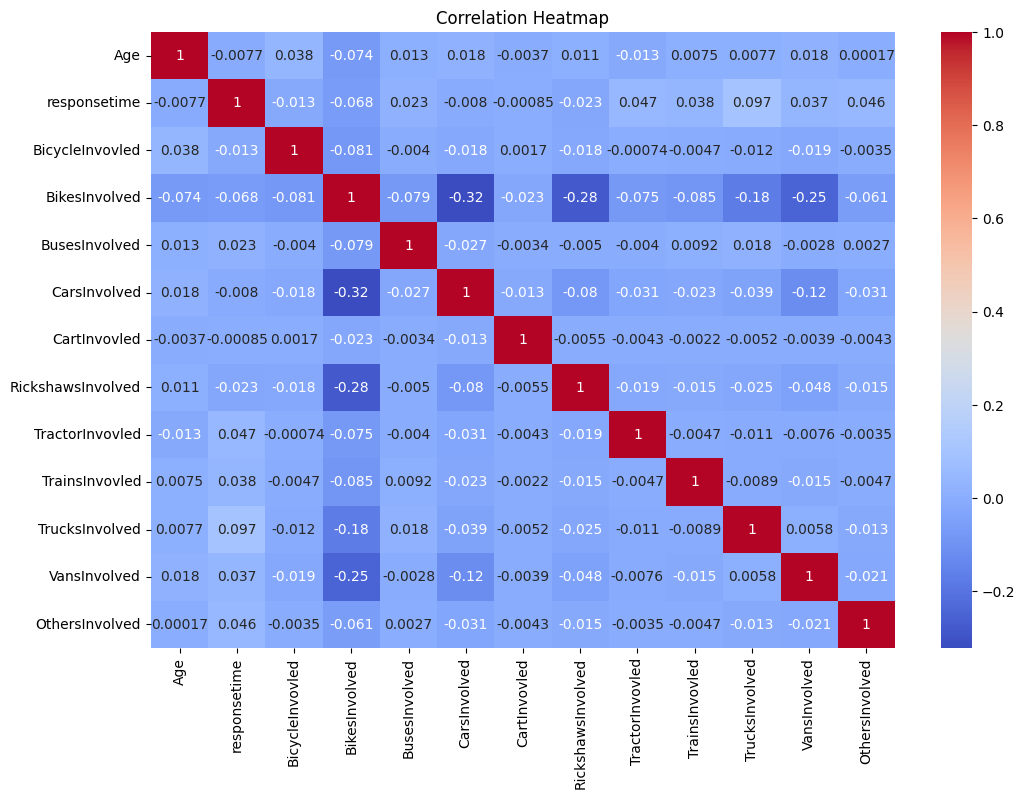

In [16]:
# Select only numerical columns for the correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])  # Only include numerical columns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')  # Pass only numerical columns
plt.title('Correlation Heatmap')
plt.show()

**Missing Values Analysis**

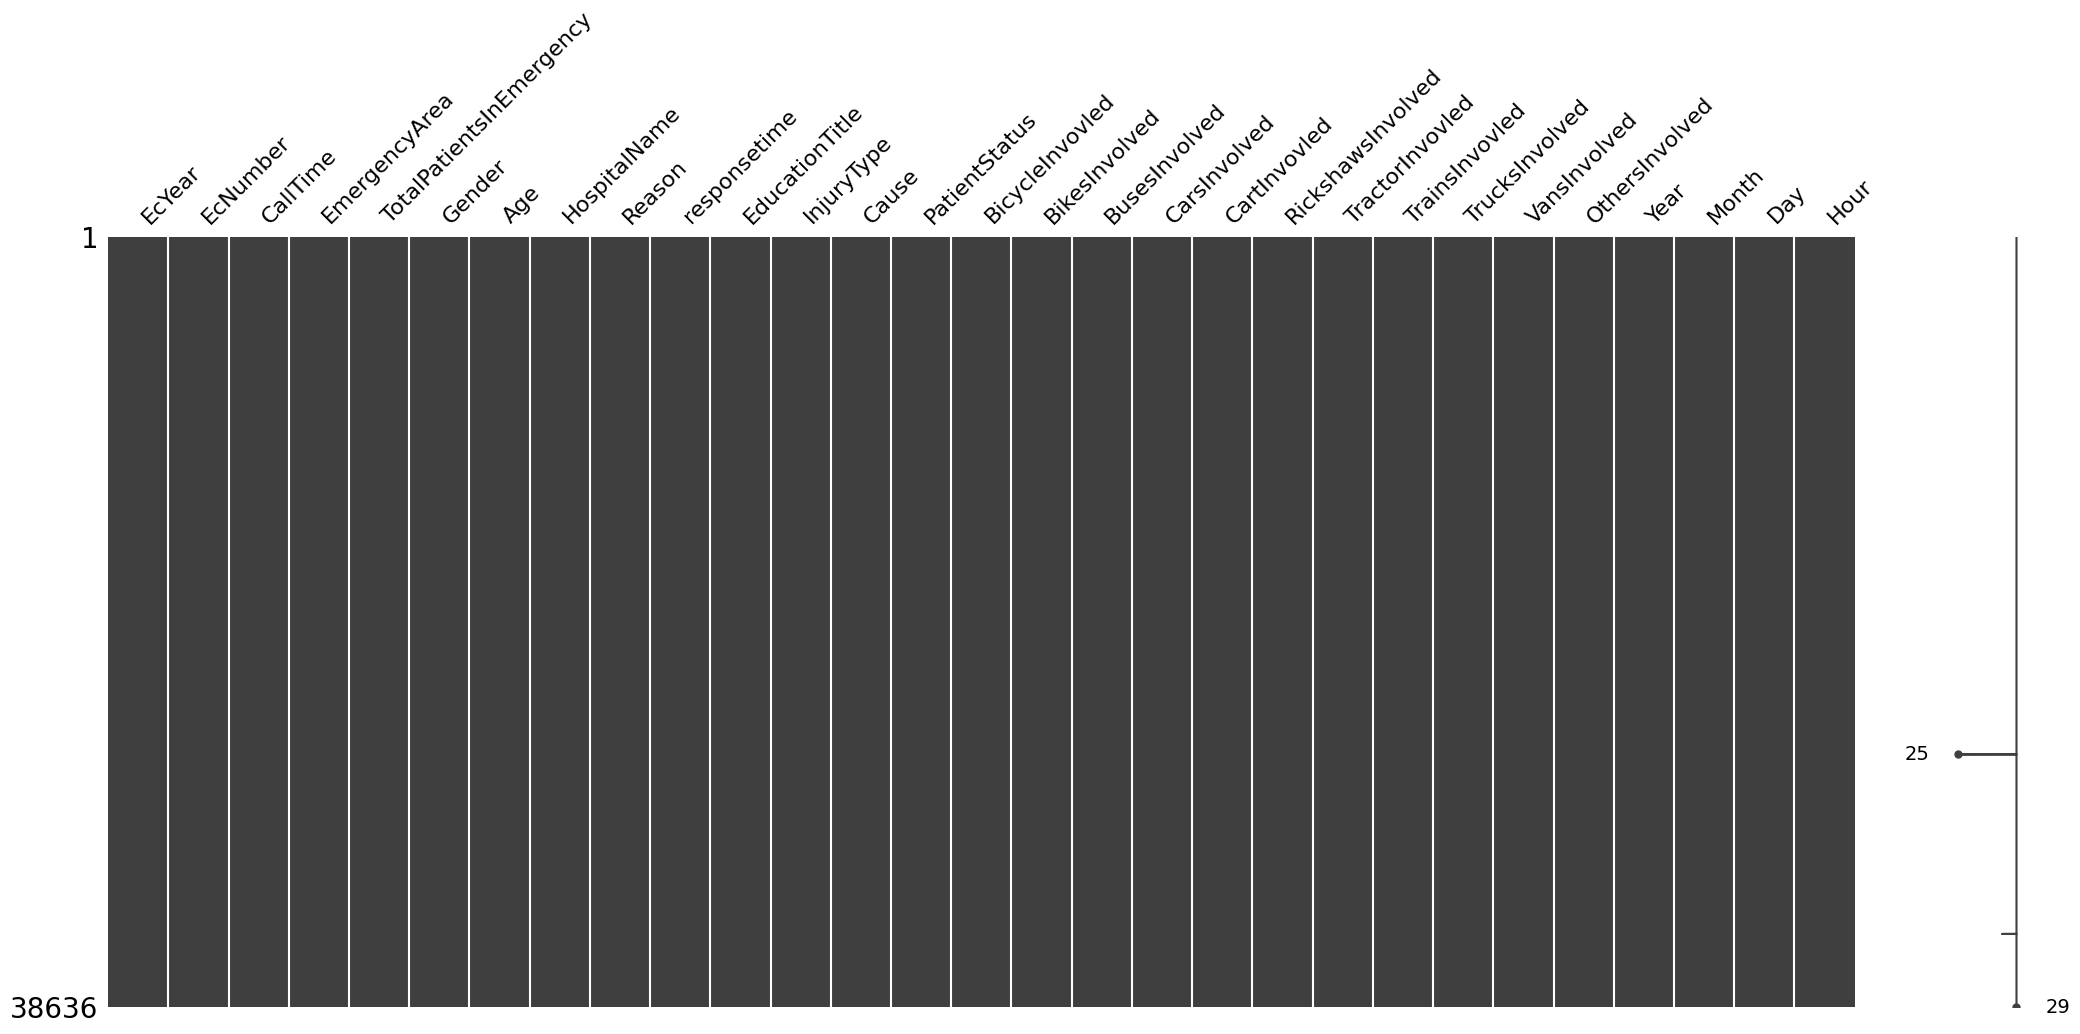

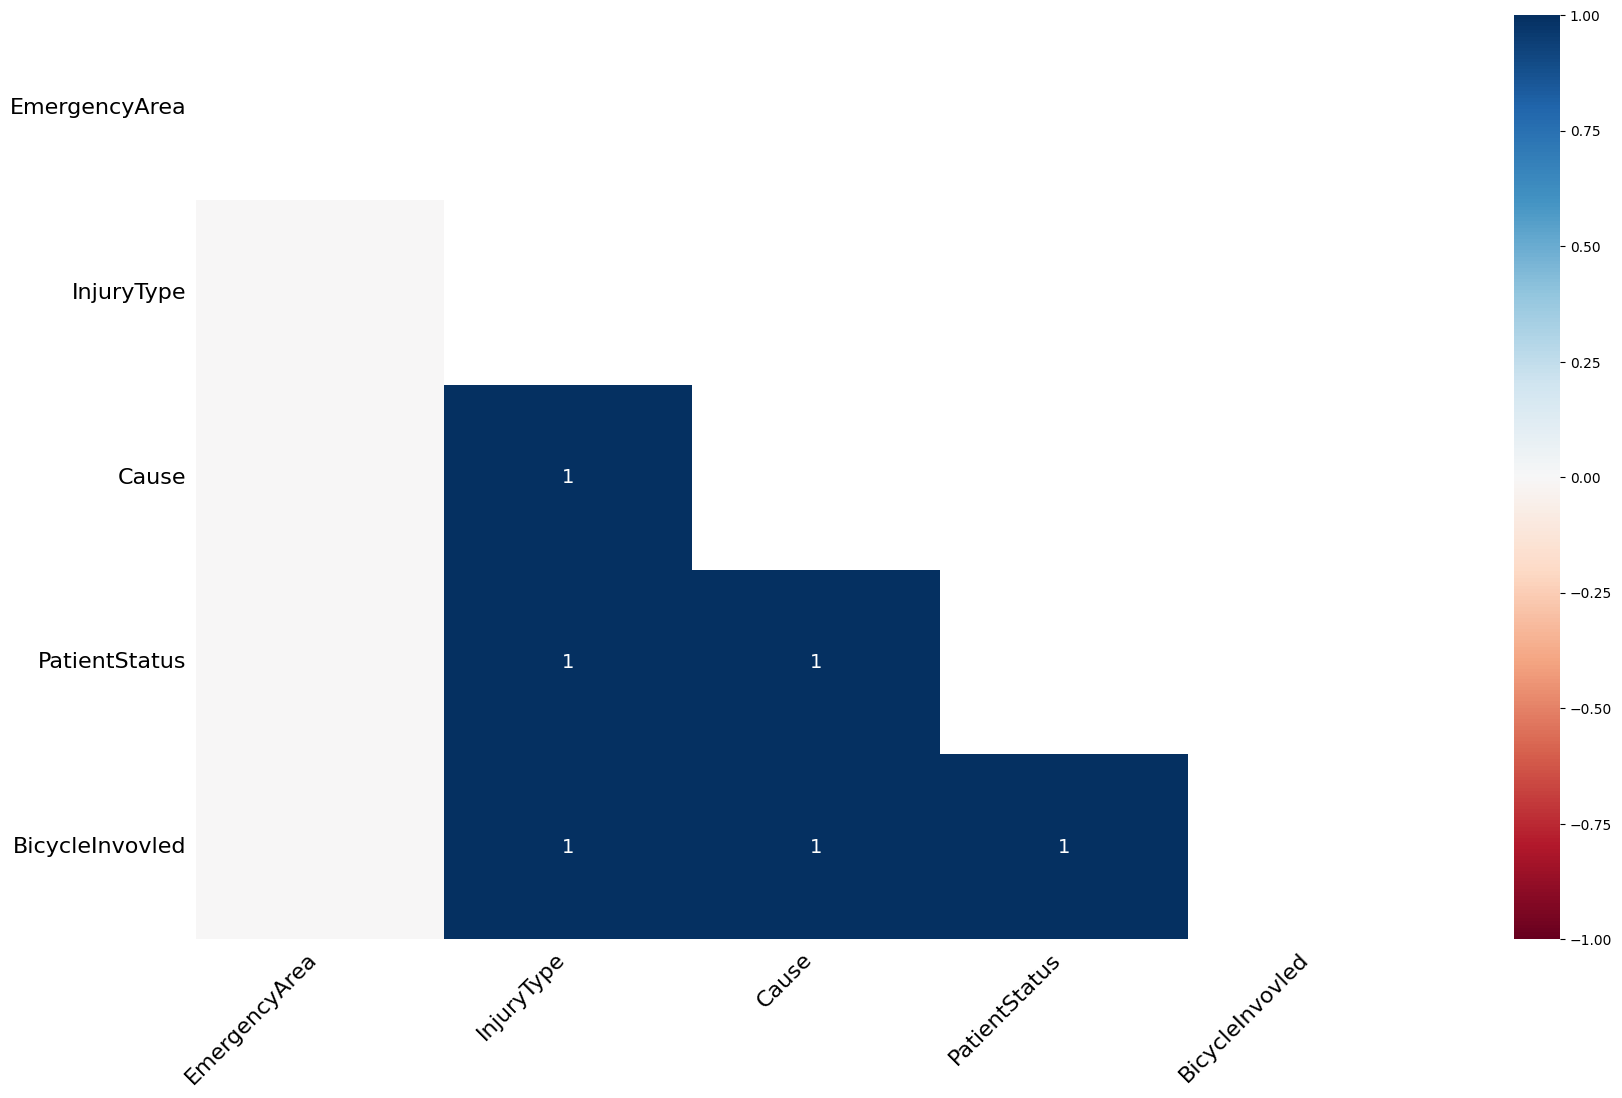

EcYear                      0
EcNumber                    0
CallTime                    0
EmergencyArea               1
TotalPatientsInEmergency    0
Gender                      0
Age                         0
HospitalName                0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  1
Cause                       1
PatientStatus               1
BicycleInvovled             1
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvovled                0
RickshawsInvolved           0
TractorInvovled             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
Year                        0
Month                       0
Day                         0
Hour                        0
dtype: int64


In [17]:
# Visualize missing values
import missingno as msno

# Missing data matrix
msno.matrix(df_cleaned)
plt.show()

# Missing data heatmap
msno.heatmap(df_cleaned)
plt.show()

# Count missing values in each column
print(df_cleaned.isnull().sum())

**Outliers Detection and Visualization**

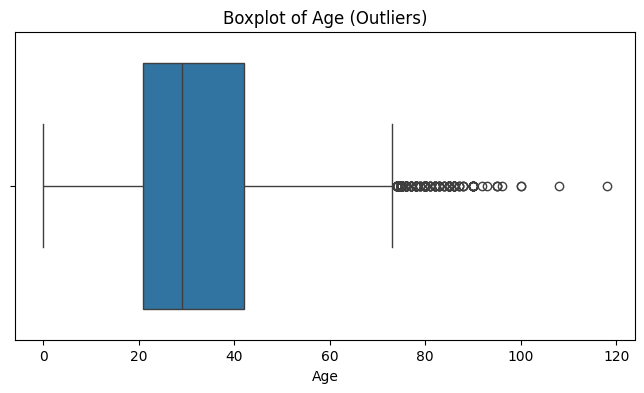

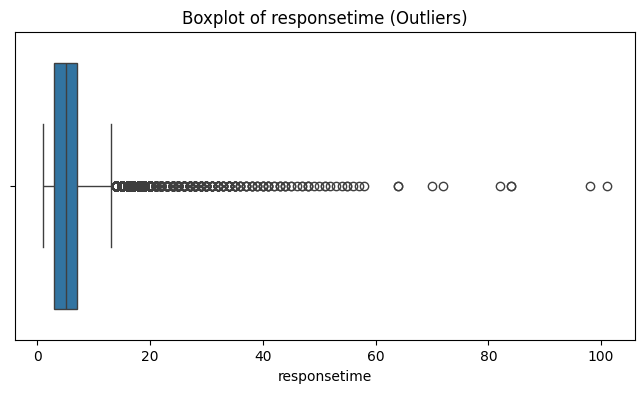

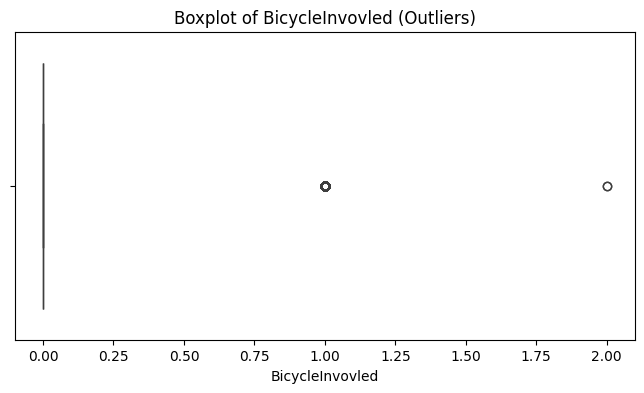

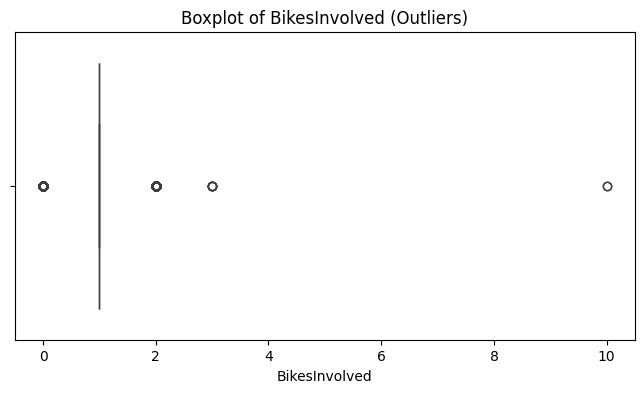

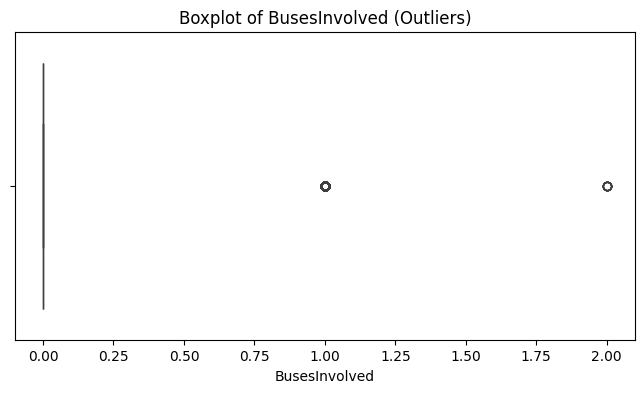

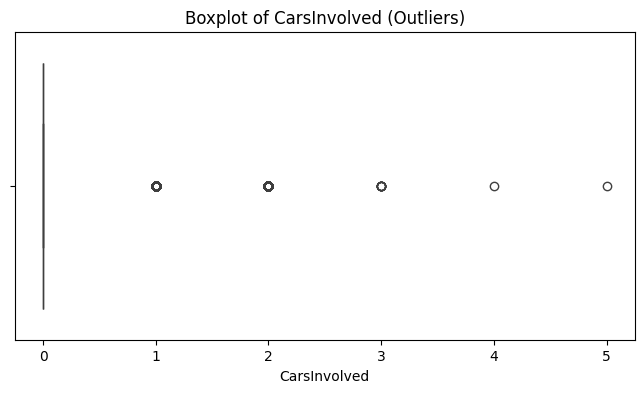

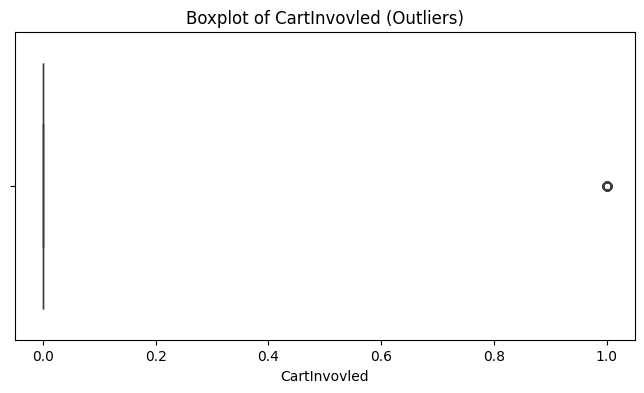

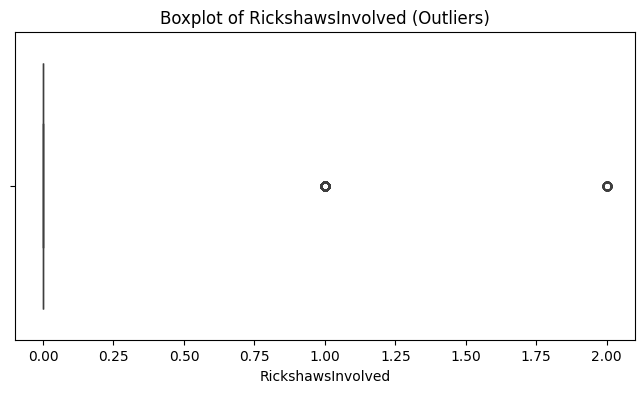

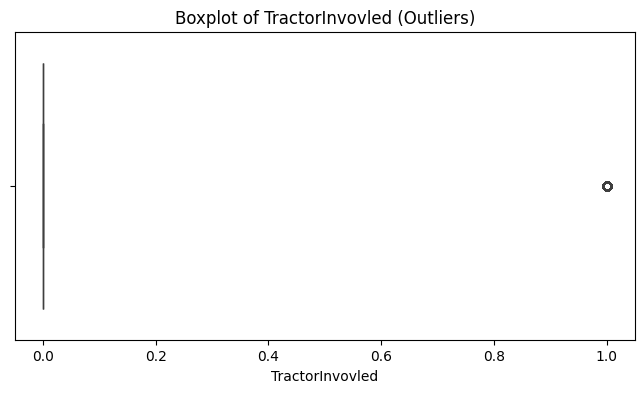

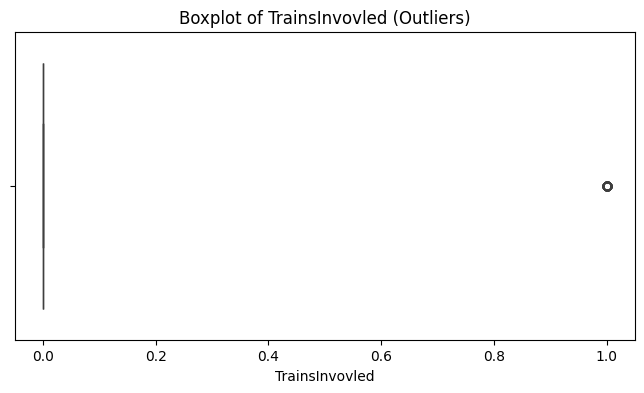

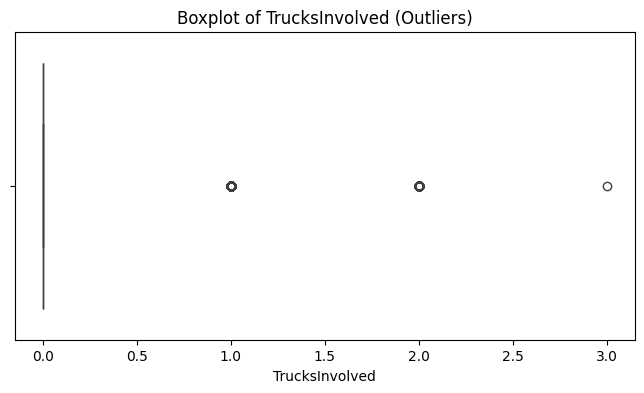

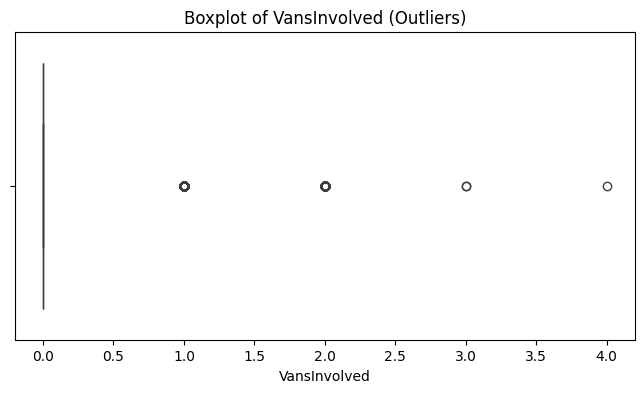

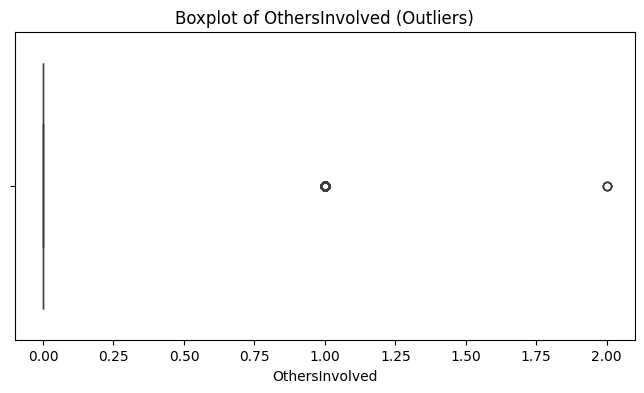

In [18]:
# Boxplots for detecting outliers in numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} (Outliers)')
    plt.show()

**Deeper Insights into Injury Type and Patient Status**

**Relationship Between Injury Type and Other Variables**

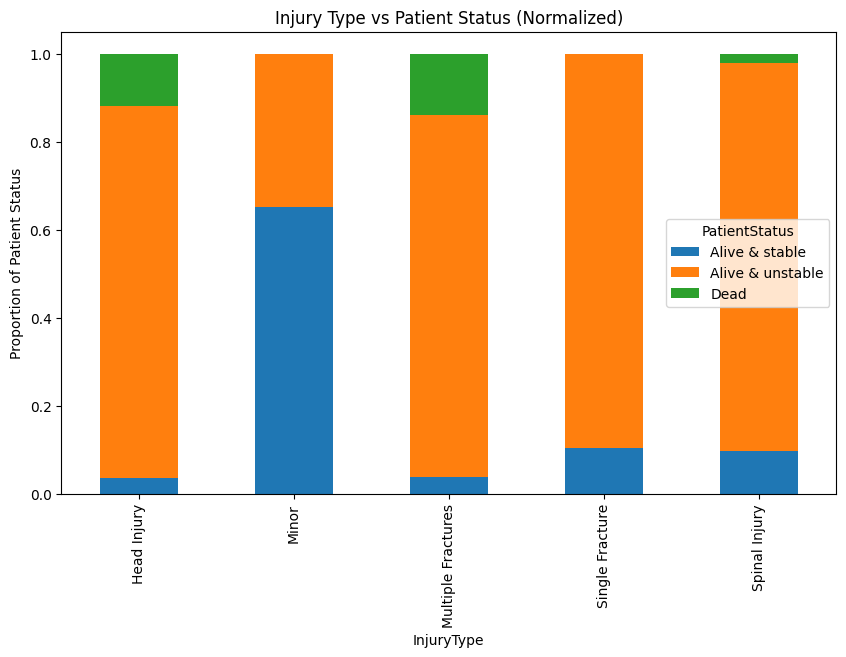

In [19]:
# Crosstab between Injury Type and Patient Status with proportions
injury_status_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'], normalize='index')
injury_status_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Patient Status (Normalized)')
plt.ylabel('Proportion of Patient Status')
plt.show()

**Injury Type vs Other Categorical Variables**

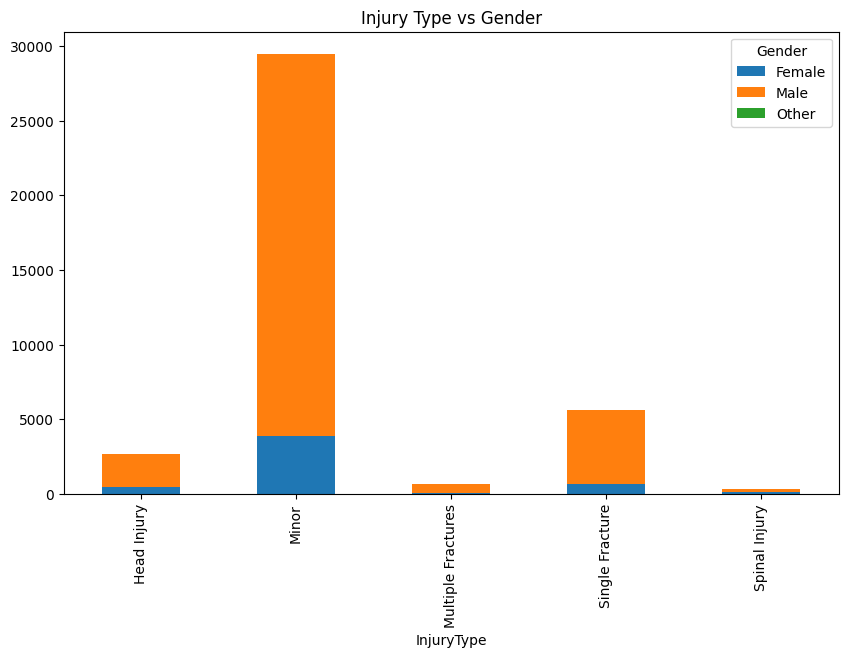

In [20]:
# Crosstab between Injury Type and Gender
injury_gender_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['Gender'])
injury_gender_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Gender')
plt.show()

**Temporal Analysis Based on Injury Type**

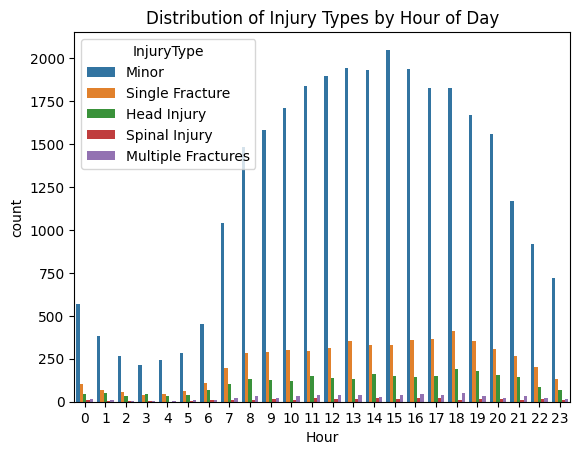

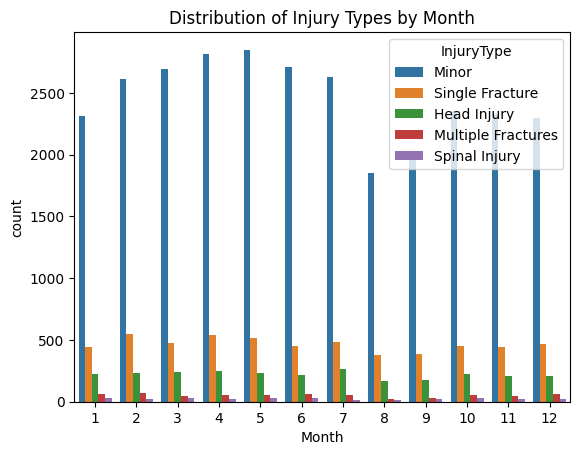

In [21]:
# Incidents by Hour of Day and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of Day')
plt.show()

# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

**Pairing Categorical and Numerical Variables**

**Numerical Summary Based on Injury Type**

In [23]:
# Summary statistics for Age and Response Time by Injury Type
summary_stats = df_cleaned.groupby('InjuryType')[['Age', 'responsetime']].describe()
print(summary_stats)

                        Age                                                  \
                      count       mean        std   min    25%   50%    75%   
InjuryType                                                                    
Head Injury          2640.0  34.350758  16.201942   0.0  22.00  30.0  45.00   
Minor               29491.0  32.269608  15.029544   0.0  21.00  28.0  41.00   
Multiple Fractures    622.0  35.924437  16.953638   2.0  22.00  33.0  48.00   
Single Fracture      5586.0  34.003043  15.247683   1.0  22.00  31.0  45.00   
Spinal Injury         296.0  34.172297  13.584414  13.0  23.75  32.0  43.25   

                          responsetime                                     \
                      max        count      mean       std  min  25%  50%   
InjuryType                                                                  
Head Injury         100.0       2640.0  7.807197  6.471697  1.0  4.0  6.0   
Minor               118.0      29491.0  5.737616  4.206665 

**Boxplots for Multivariate Relationships**

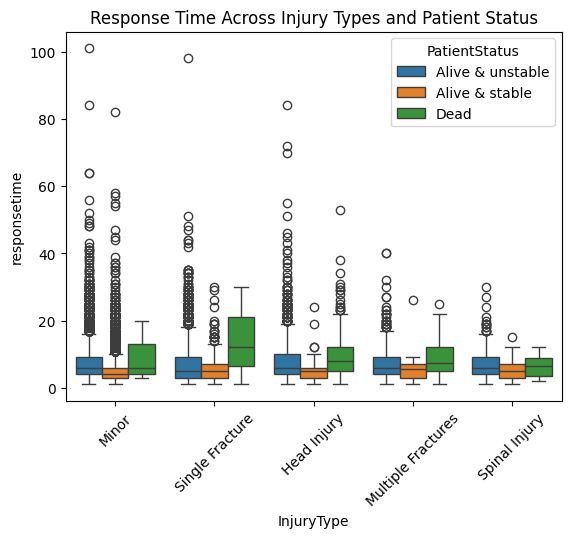

In [24]:
# Boxplot for Response Time across Injury Type, with Hue as Patient Status
sns.boxplot(x='InjuryType', y='responsetime', hue='PatientStatus', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Response Time Across Injury Types and Patient Status')
plt.show()


**Exploring Correlations with Focus on Patient Outcomes**

**Encoding Categorical Variables**

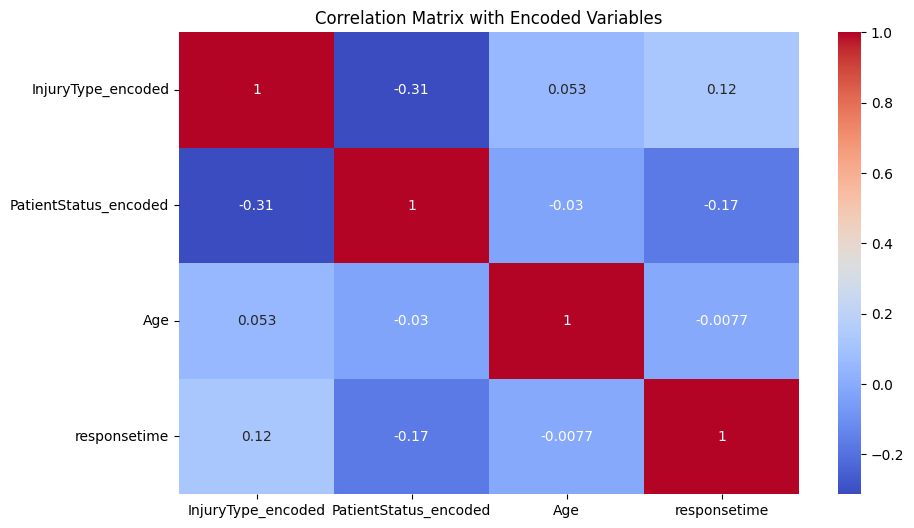

In [25]:
# Encode Injury Type and Patient Status
df_encoded = df_cleaned.copy()
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded Injury Type and Patient Status
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Variables')
plt.show()


**Explore Additional Categorical Variables' Impact on Patient Status and Injury Type**

**Crosstab Analysis for Other Categorical Variables**

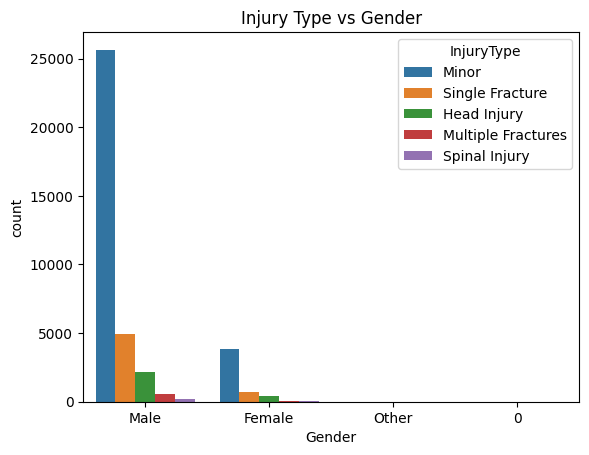

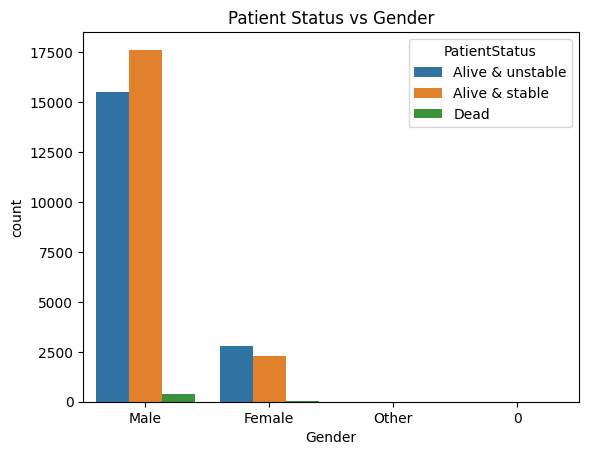

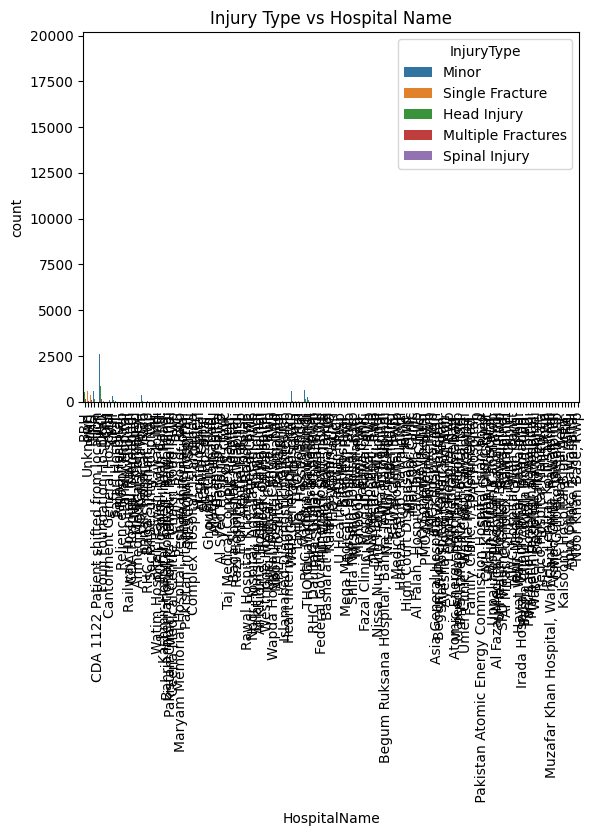

In [26]:
# Crosstab between InjuryType and Gender
sns.countplot(x='Gender', hue='InjuryType', data=df_cleaned)
plt.title('Injury Type vs Gender')
plt.show()

# Crosstab between Patient Status and Gender
sns.countplot(x='Gender', hue='PatientStatus', data=df_cleaned)
plt.title('Patient Status vs Gender')
plt.show()

# Crosstab between InjuryType and Hospital
sns.countplot(x='HospitalName', hue='InjuryType', data=df_cleaned)
plt.title('Injury Type vs Hospital Name')
plt.xticks(rotation=90)
plt.show()


**Advanced Correlation Analysis Between Features**

**Feature Importance or Correlation Heatmap with Encoded Variables**

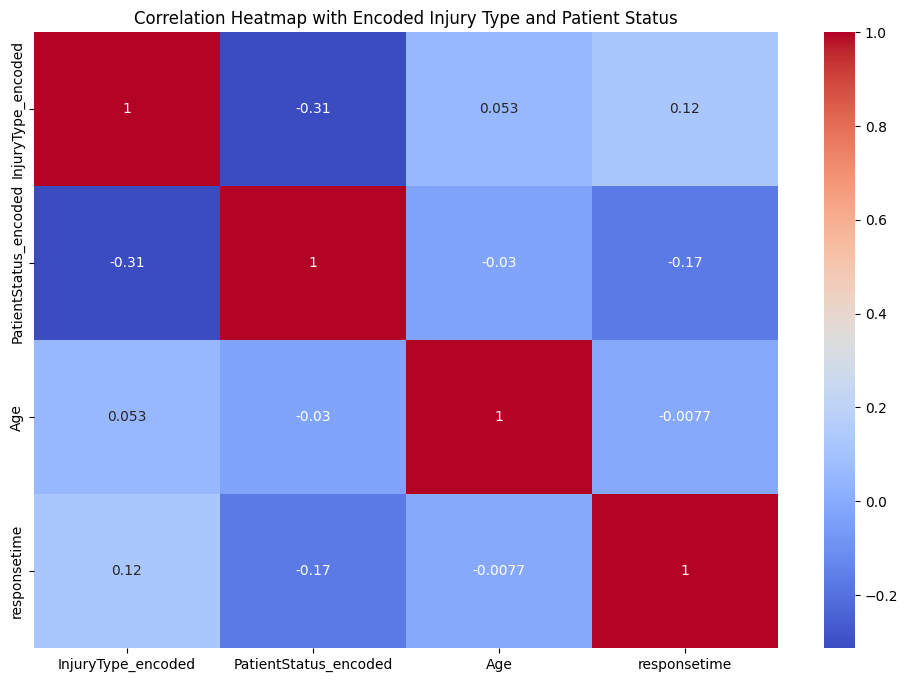

In [27]:
# Encoding categorical columns to numerical for better correlation analysis
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Injury Type and Patient Status')
plt.show()


**Temporal Analysis: Seasonal and Hourly Trends**

**Temporal Trends in Injury Type**

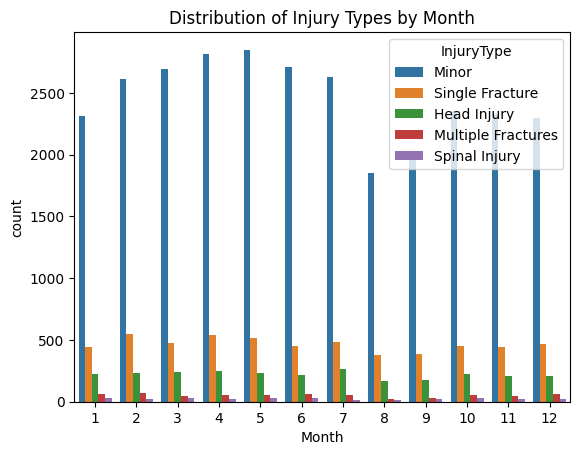

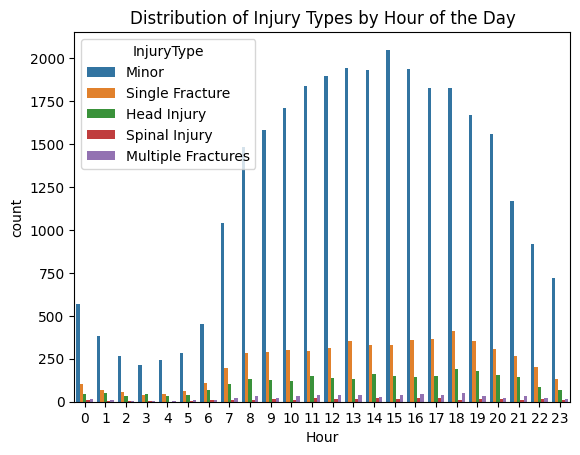

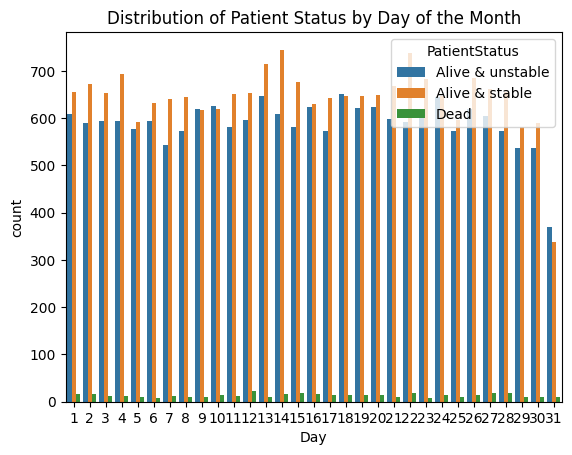

In [28]:
# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

# Incidents by Hour and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of the Day')
plt.show()

# Incidents by Day and Patient Status
sns.countplot(x='Day', hue='PatientStatus', data=df_cleaned)
plt.title('Distribution of Patient Status by Day of the Month')
plt.show()


**Vehicle Involvement and Its Impact on Injury and Patient Status**

**Explore the Influence of Different Vehicle Involvements**

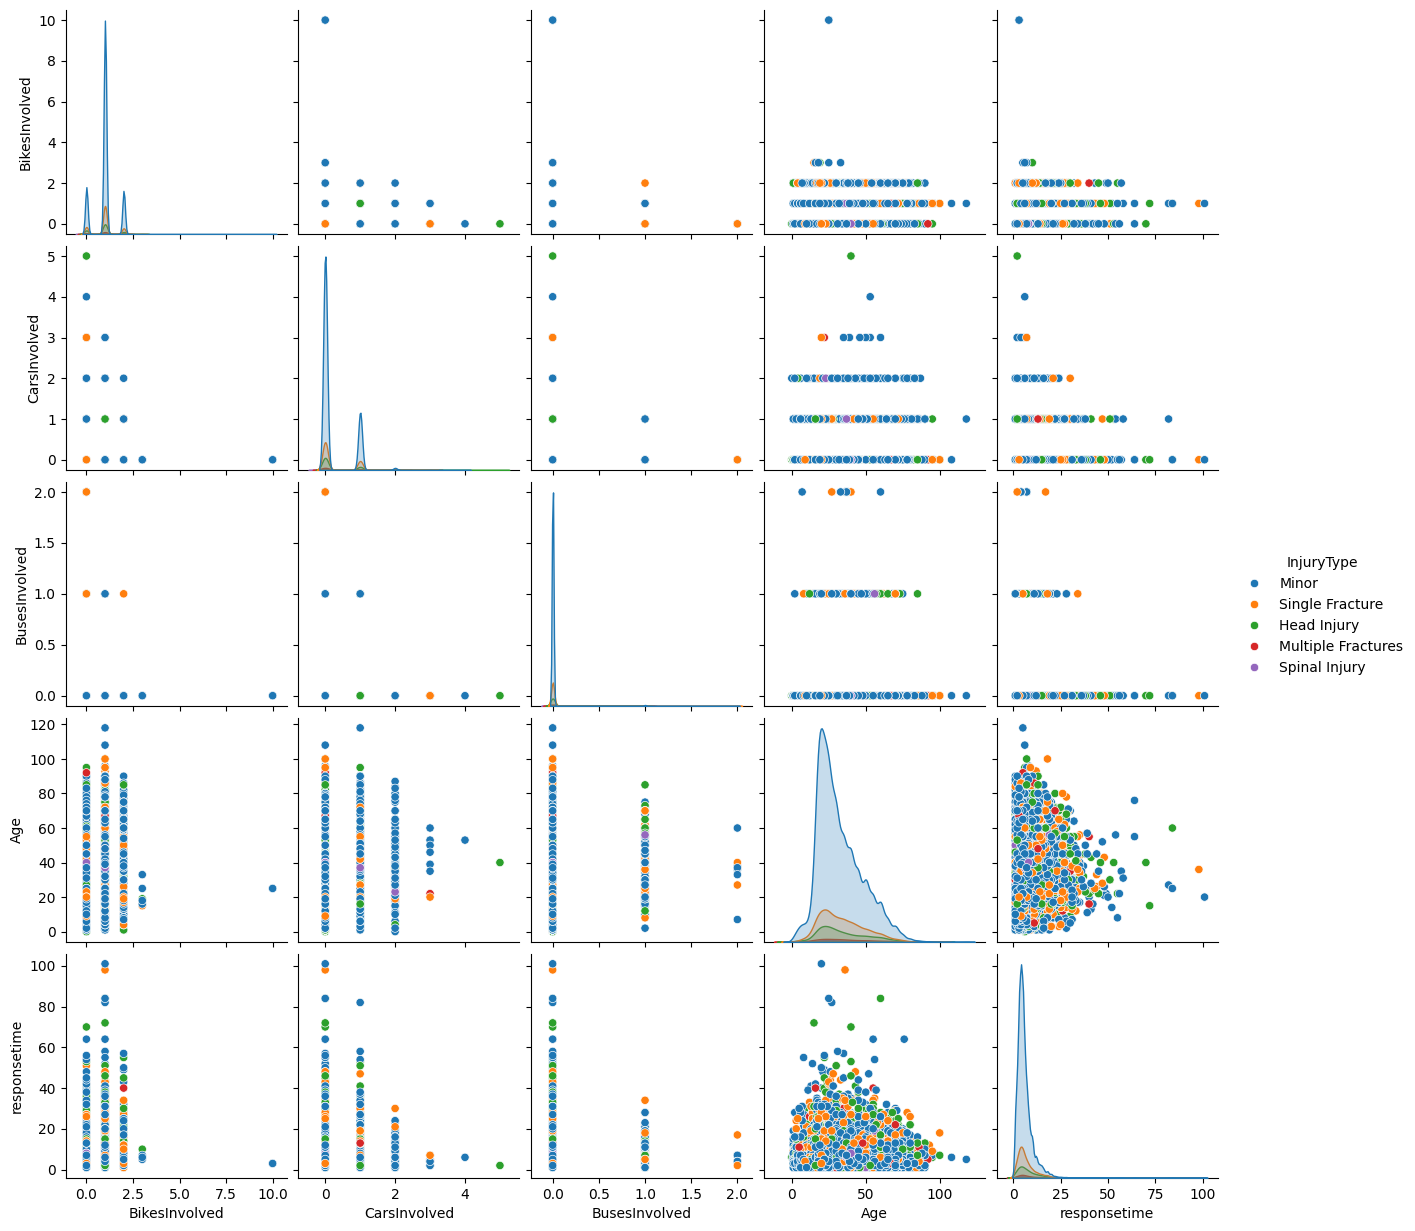

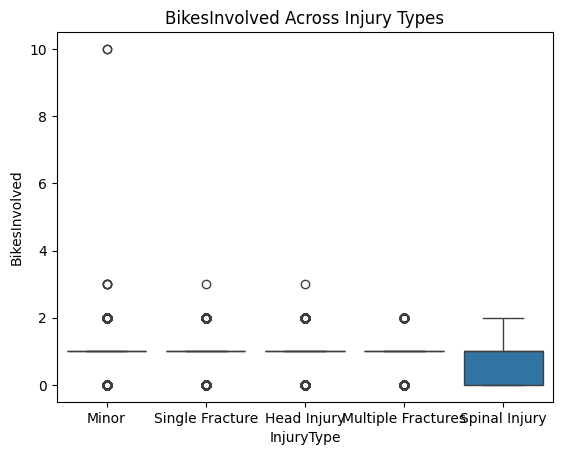

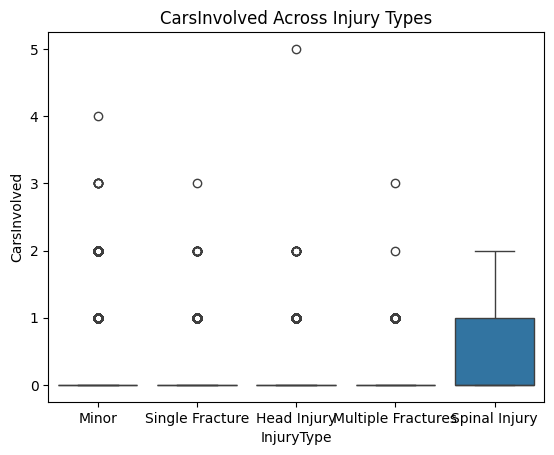

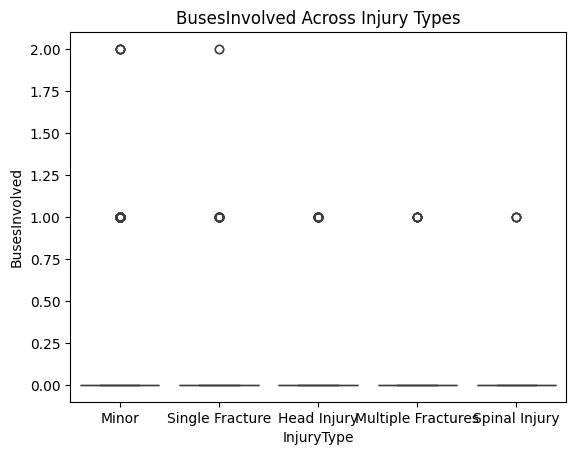

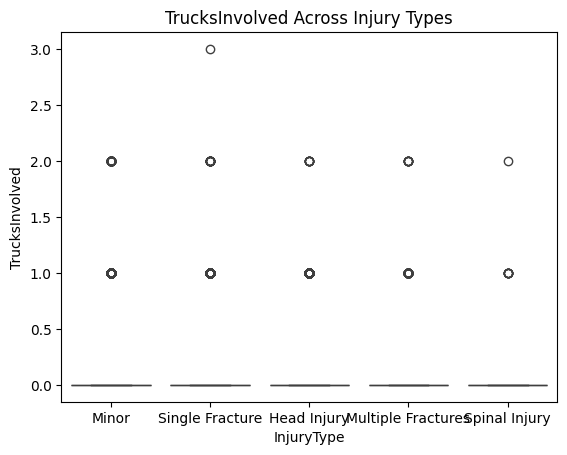

In [29]:
# Pair plot to see relationships between vehicle involvement, injury type, and patient status
sns.pairplot(df_cleaned, vars=['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'Age', 'responsetime'], hue='InjuryType')
plt.show()

# Crosstab between InjuryType and Vehicles Involved
vehicle_involvement_cols = ['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'TrucksInvolved']
for col in vehicle_involvement_cols:
    sns.boxplot(x='InjuryType', y=col, data=df_cleaned)
    plt.title(f'{col} Across Injury Types')
    plt.show()
